In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
PurchasePrice = pd.read_csv("C:\\Users\\Sayali\\Downloads\\2017PurchasePricesDec.csv (1).zip")
PurchasePrice

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [19]:
PurchasePrice.shape

(12261, 9)

In [20]:
PurchasePrice.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [21]:
PurchasePrice.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [22]:
PurchasePrice[PurchasePrice['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [24]:
# Dropping the null values
PurchasePrice.dropna(inplace=True)

In [25]:
PurchasePrice.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object

In [26]:
PurchasePrice.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12260.000000,12260.000000,12260.000000,12260.000000,12260.000000
mean,17990.191680,38.643392,1.709054,26.489467,10815.704731
std,12528.395592,206.159284,0.454217,156.189257,19008.228360
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5991.500000,10.990000,1.000000,6.890000,3960.000000
50%,18789.000000,15.990000,2.000000,10.645000,7153.000000
75%,25117.250000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


#Univariate analysis

In [27]:
PurchasePrice.VendorName.value_counts()[0:5]

VendorName
MARTIGNETTI COMPANIES          1631
ULTRA BEVERAGE COMPANY LLP      965
M S WALKER INC                  960
PERFECTA WINES                  897
E & J GALLO WINERY              527
Name: count, dtype: int64

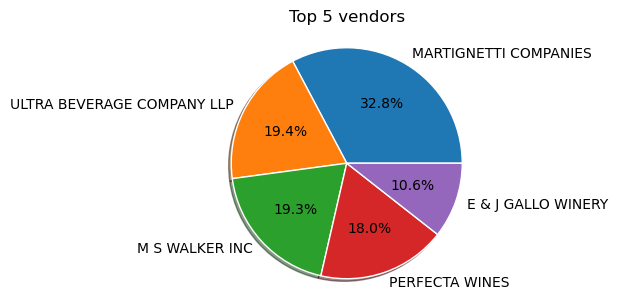

In [28]:
plt.figure(figsize=(3,3))

mylabels=["MARTIGNETTI COMPANIES","ULTRA BEVERAGE COMPANY LLP" ,'M S WALKER INC','PERFECTA WINES','E & J GALLO WINERY']


plt.pie(PurchasePrice.VendorName.value_counts()[0:5],labels=mylabels ,autopct='%0.1f%%',radius=1.25,
        wedgeprops={'edgecolor':'white'}
        ,textprops={'size':10,},shadow=True)

plt.title('Top 5 vendors\n')
plt.show()

#Bivariate Analysis

C:\Users\Sayali\AppData\Local\Temp\ipykernel_12776\356539261.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = vc[i]


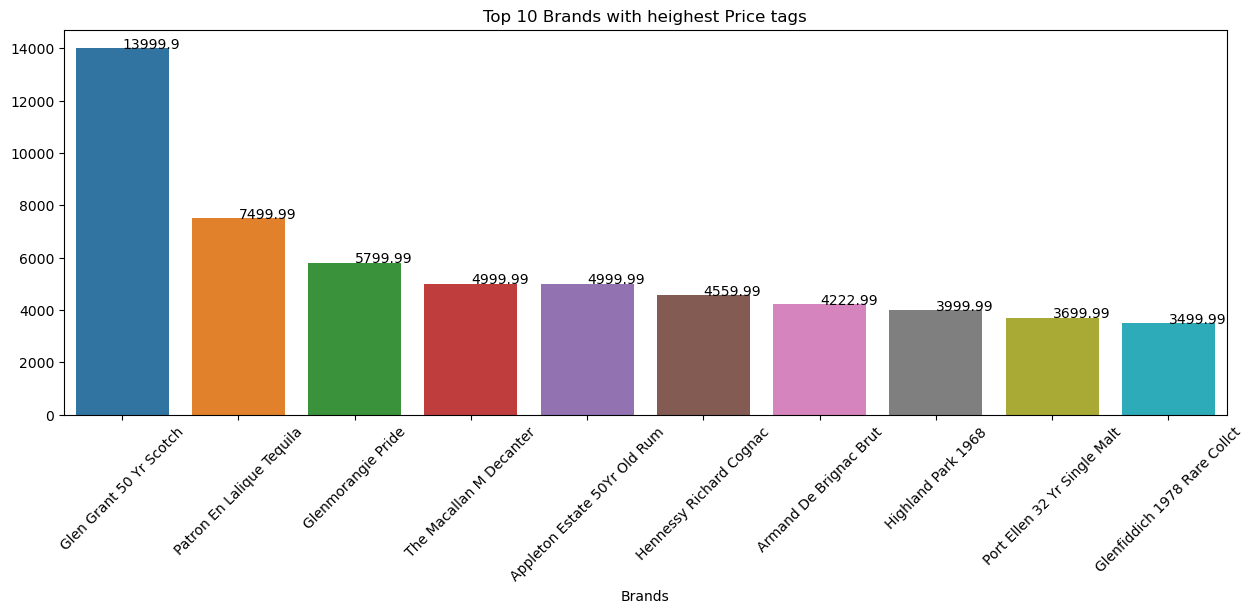

In [29]:
plt.figure(figsize=(15,5))
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]

g = sns.barplot(x= vc.index , y = vc.values , data = PurchasePrice)

for i in range(10):
    value = vc[i]
    g.text(y = value -2, x= i+0.25, s= value, color='black', ha = 'center', fontsize= 10)

plt.title ('Top 10 Brands with heighest Price tags')
plt.xlabel('Brands')
plt.xticks(rotation= 45)
plt.show()    